### Задача№1
#### Условие
+ Постройте график
+ Назовите график
+ Сделайте именование оси x и оси y
+ Сделайте выводы

---
##### 1.1. Скачать файл kc_house_data.csv - приложен на платформе


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---

##### 1.2 Изучите стоимости недвижимости

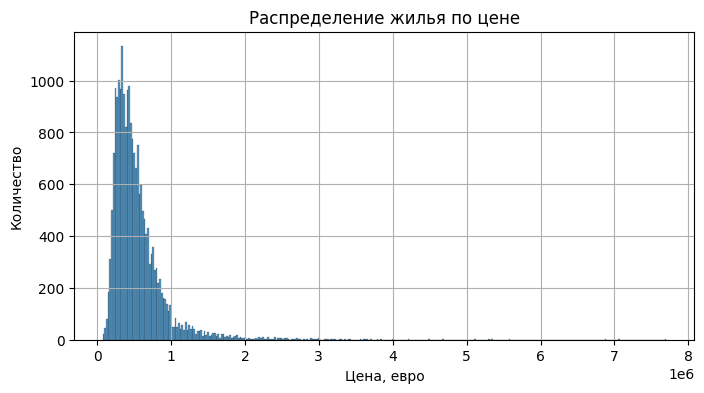

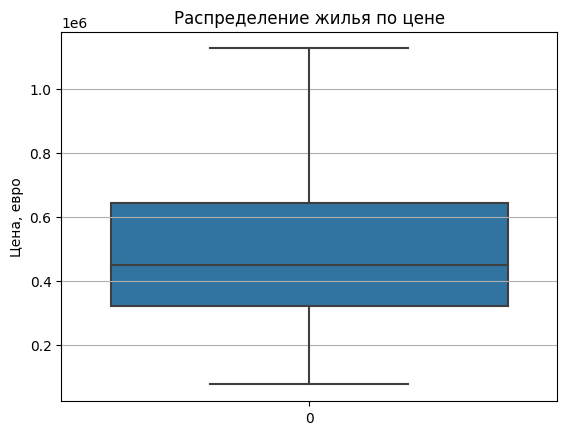

In [47]:
plt.figure(figsize=(8, 4))
df['price'] = df['price'].astype('int64')
plt.grid()
sns.histplot(x=df['price'])
plt.xlabel('Цена, евро')
plt.ylabel('Количество')
plt.title('Распределение жилья по цене')
plt.show()
plt.grid()
plt.ylabel('Цена, евро')
plt.title('Распределение жилья по цене')
sns.boxplot(data=df['price'], showfliers = False)
plt.show()




*Вывод:*</br>

По первому графику видно, что стоимость большинства домов до 1 000 000 евро.</br>
По второму, что стоимость домов, за исключением статистических выбросов, лежит в диапазоне от 70 000 - 1 100 000 евро, причем 50% из них от 320 000 до 650 000 евро</br>

---


#### 1.3 Изучите распределение квадратуры жилой площади

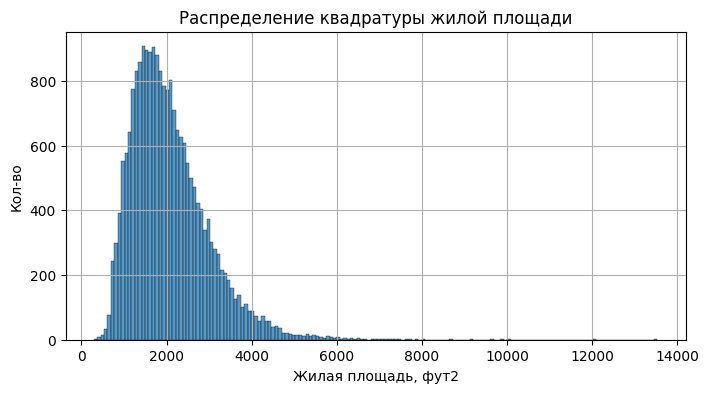

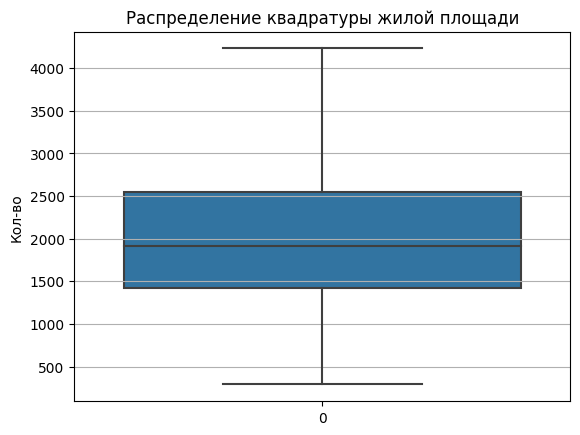

In [48]:
plt.figure(figsize=(8, 4))
plt.grid()
sns.histplot(x=df['sqft_living'])
plt.xlabel('Жилая площадь, фут2')
plt.ylabel('Кол-во')
plt.title('Распределение квадратуры жилой площади')
plt.show()
plt.grid()
plt.ylabel('Кол-во')
plt.title('Распределение квадратуры жилой площади')
sns.boxplot(data=df['sqft_living'], showfliers = False)
plt.show()

*Вывод:*</br>

По первому графику видно, что жилая площадь большинства домов до 4000 фут2.</br>
По второму, что жилая площадь домов, за исключением статистических выбросов, лежит в диапазоне 250 - 4250 фут2, причем 50% из них от 1400 до 2600 фут2</br>

---

#### 1.4 Изучите распределение года постройки

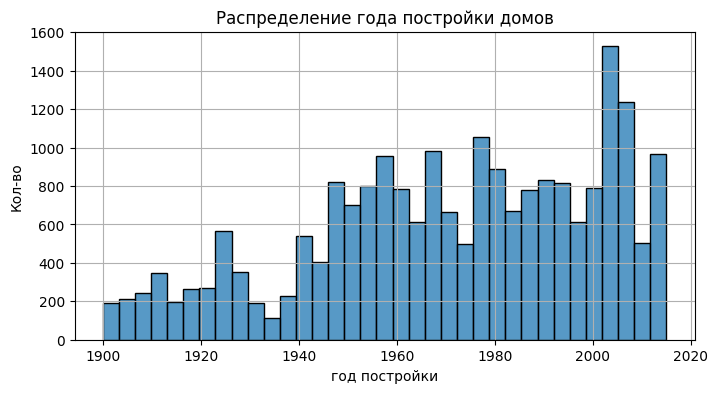

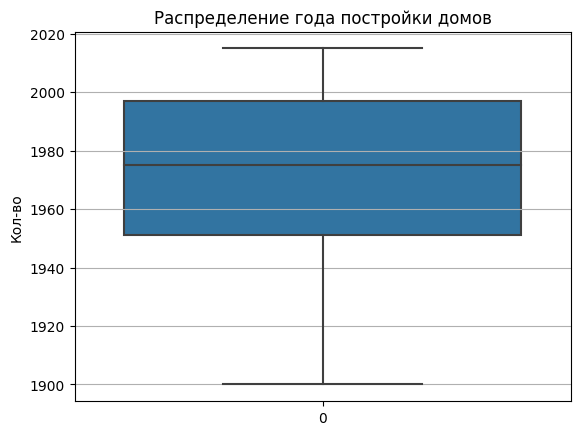

In [49]:
plt.figure(figsize=(8, 4))
plt.grid()
sns.histplot(x=df['yr_built'])
plt.xlabel('год постройки')
plt.ylabel('Кол-во')
plt.title('Распределение года постройки домов')
plt.show()
plt.grid()
plt.ylabel('Кол-во')
plt.title('Распределение года постройки домов')
sns.boxplot(data=df['yr_built'], showfliers = False)
plt.show()

*Вывод:*</br>

По первому графику видно, что дома строились с 1900 по 2015 гг</br>
По второму, что что дома строились с 1900 по 2015 гг, за исключением статистических выбросов. 50% из них построены с 1950 по 1995 </br>

---

### Задача №2

#### 2.1 Изучите распределение домов от наличия вида на набережную

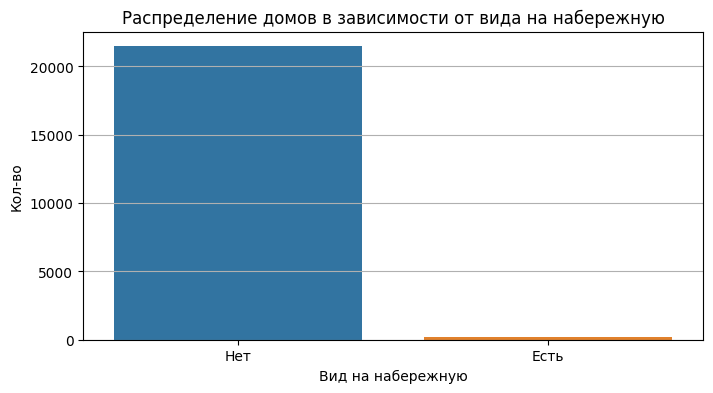

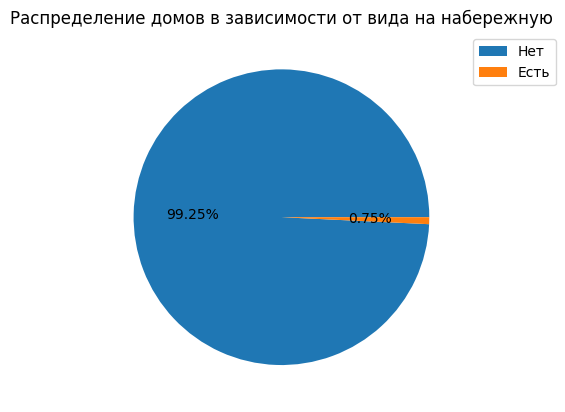

In [50]:
data = df['waterfront'].value_counts()
data
plt.figure(figsize=(8, 4))
plt.grid()
sns.barplot(x=data.index, y=data)
plt.xlabel('Вид на набережную')
plt.ylabel('Кол-во')
plt.title('Распределение домов в зависимости от вида на набережную')
plt.xticks(data.index, ['Нет', 'Есть'])
plt.show()
plt.pie(data, autopct='%1.2f%%')
plt.legend(['Нет', 'Есть'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Распределение домов в зависимости от вида на набережную')
plt.show()

*Вывод:*</br>

По первому графику видно, что у большинства домов нет вида на набережную</br>
По второму, что с видом на набережную 0.75% домов, остальные 99.25% без вида.</br>

---

#### 2.2 Изучите распределение этажей домов

In [51]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

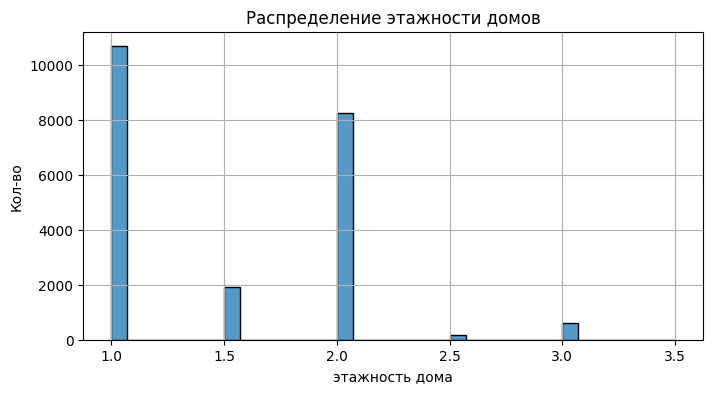

In [52]:
plt.figure(figsize=(8, 4))
plt.grid()
sns.histplot(x=df['floors'])
plt.xlabel('этажность дома')
plt.ylabel('Кол-во')
plt.title('Распределение этажности домов')
plt.show()


*Вывод:*</br>

У большинства домов 1 или 2 этажа

---

#### 2.3 Изучите распределение состояния домов

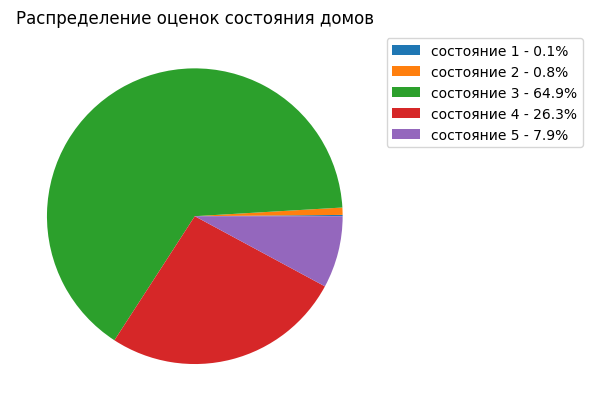

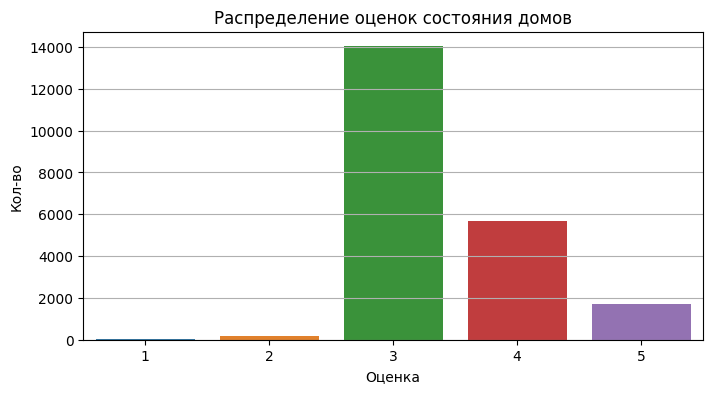

In [53]:
data = df['condition'].value_counts().sort_index()
total = sum(data)
label = [f'состояние {n} - {v/total:.1%}' for n, v in zip(data.index, data)]
plt.pie(data)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=label)
plt.title('Распределение оценок состояния домов')
plt.show()
plt.figure(figsize=(8, 4))
plt.grid()
sns.barplot(x=data.index, y= data)
plt.xlabel('Оценка')
plt.ylabel('Кол-во')
plt.title('Распределение оценок состояния домов')
plt.show()


*Вывод:*</br>

У большинства домов среднее состояние. Дома в отличном состоянии найти сложнее чем в хорошем. Откровенно "убитых" домов мало.

---

#### Задача №3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока</br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

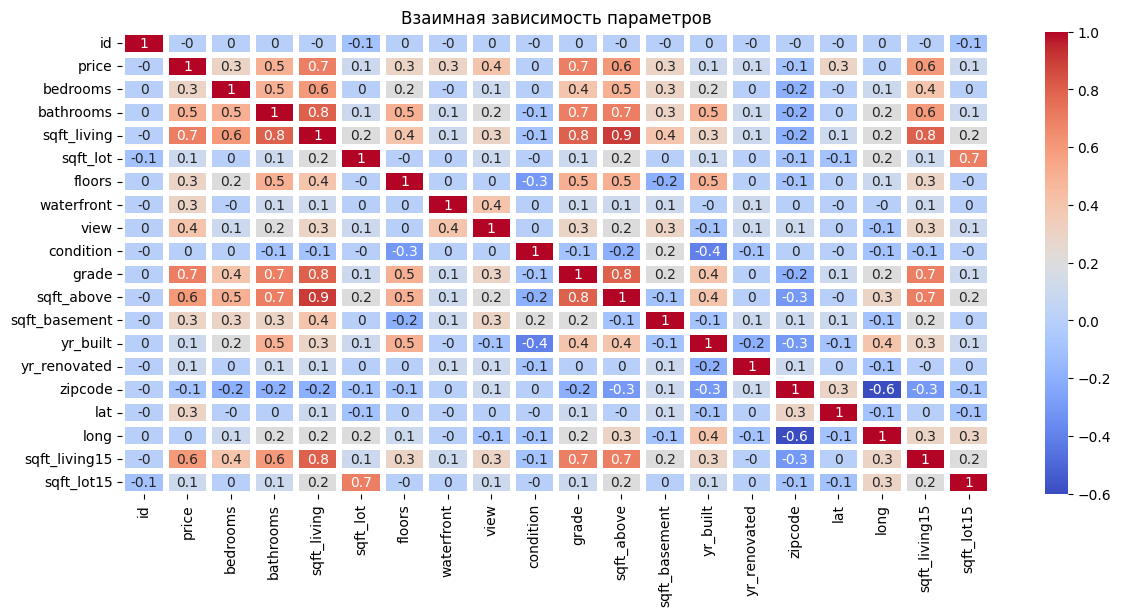

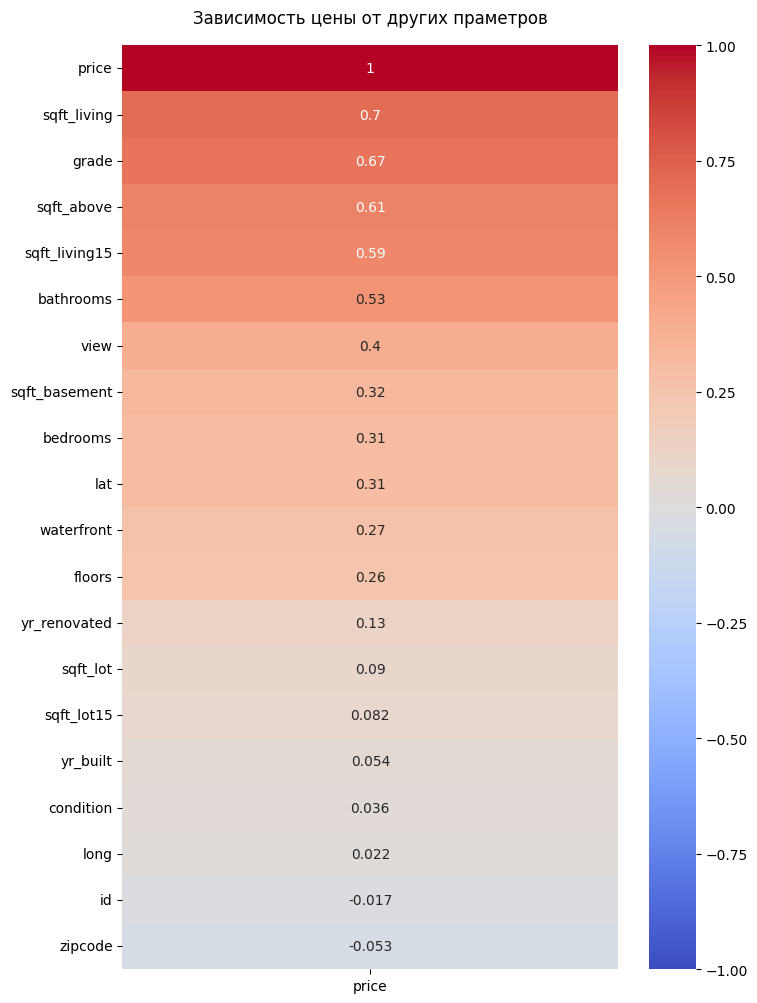

In [54]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=3, cmap = 'coolwarm')
plt.title('Взаимная зависимость параметров')
plt.show()
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Зависимость цены от других праметров', pad=16)
plt.show()

*Вывод:*</br>

На стоимость дома с участком максимально влияют следующие факторы:
+ Жилая площадь
+ Оценка
+ Площадь дома без подвала
+ Средняя жилая площадь 15 соседей

на удивление нет никакой зависимости от:
- общей площади
- состояния
- года постройки
- года ремонта


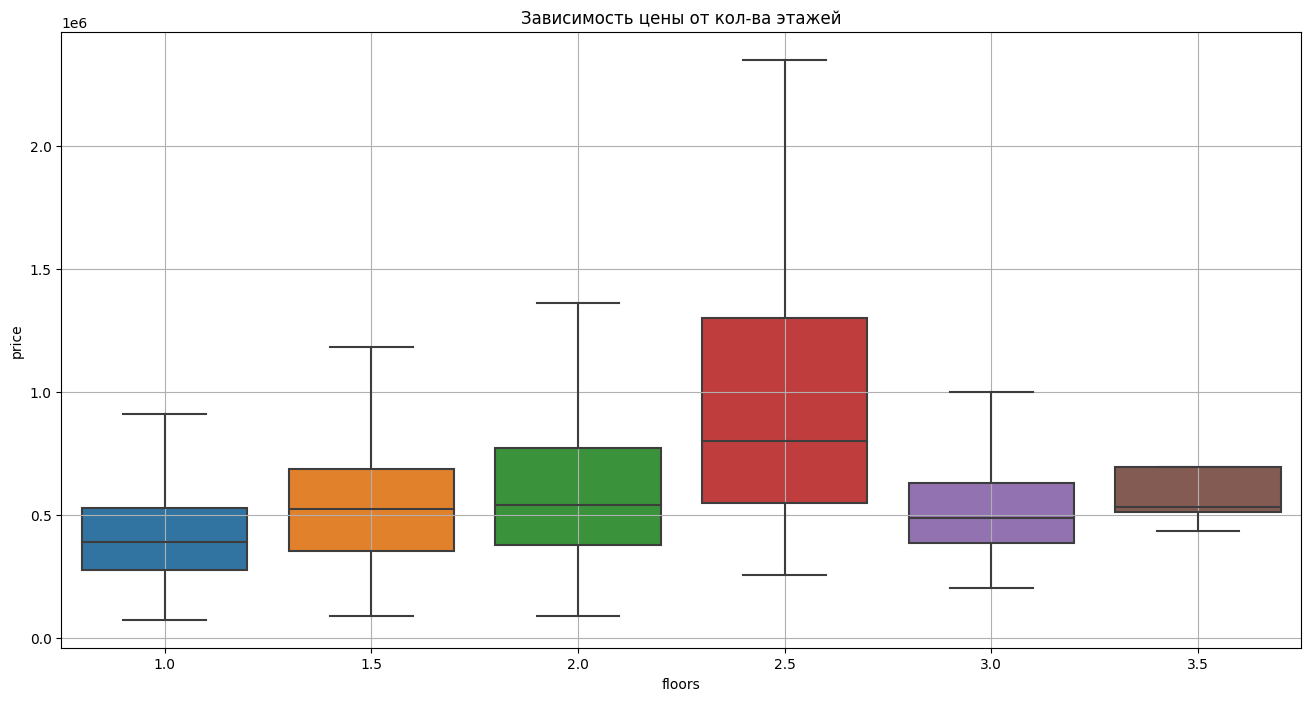

In [55]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['floors'], y=df['price'], whis=1.5, showfliers = False)
plt.title('Зависимость цены от кол-ва этажей')
plt.grid()
plt.show()



*Вывод:*

Есть небольшая зависимость. С ростом этажности средняя цена дома растёт. Это справедливо для домов до 3 этажей. Средняя цена дома с этажностью 3 и 3.5 сопоставима с 1.5 этажным.

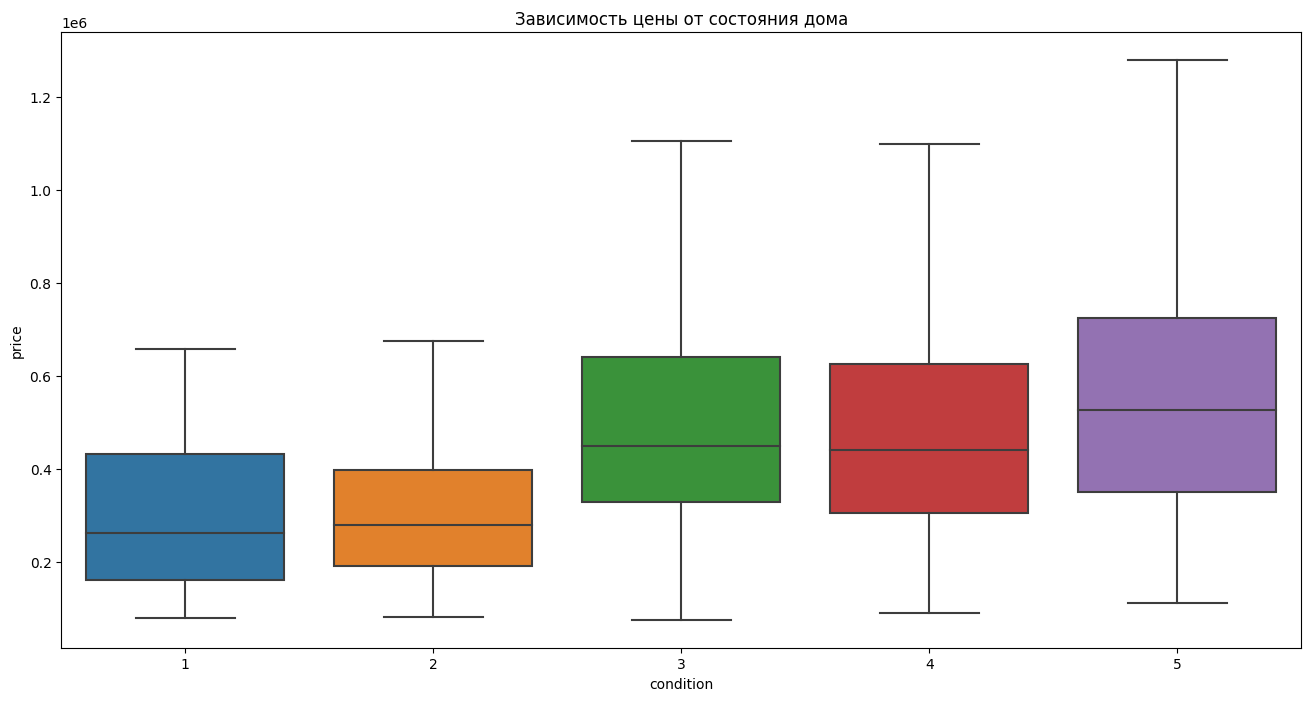

In [68]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['condition'], y=df['price'], whis=1.5, showfliers = False)
plt.title('Зависимость цены от состояния дома')
plt.show()

*Вывод:*

Чем лучше состояние дома, тем выше средняя цена, но в тоже время дома с разной оценкой могут стоить одинаково. Зависимость слабо выражена.

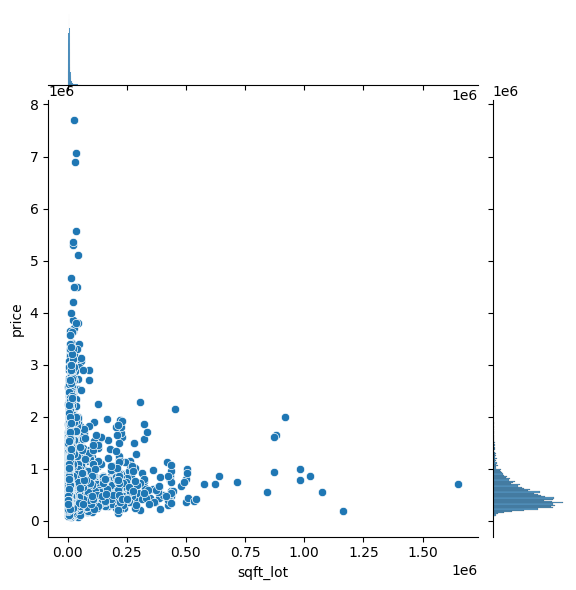

In [64]:
sns.jointplot(y=df['price'], x=df['sqft_lot'])
plt.show()

*Вывод:*

Зависимости цены от общей площади не видно

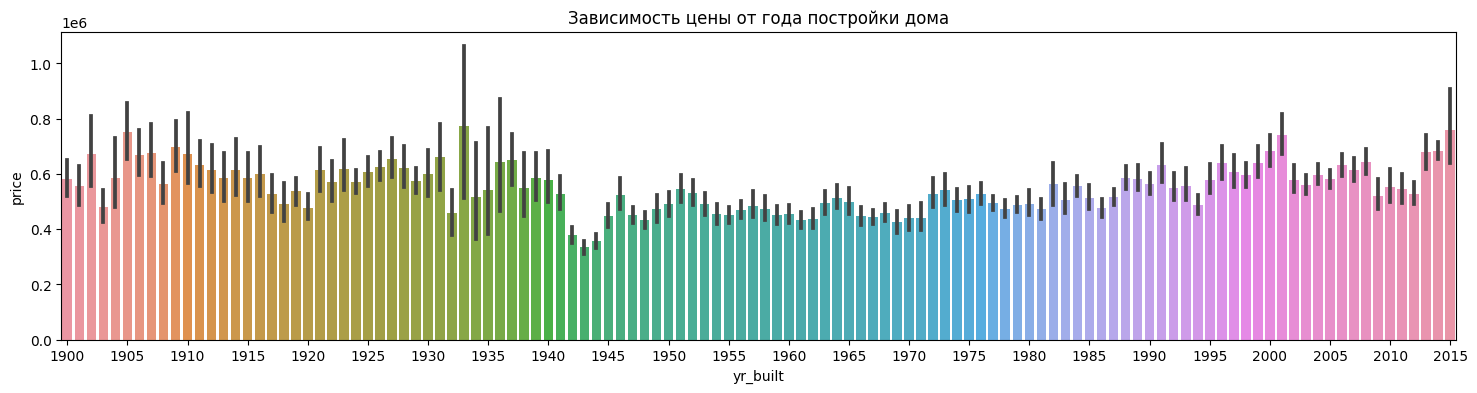

In [58]:
fig, ax = plt.subplots(figsize=(18,4))
sns.barplot(x = df['yr_built'], y = df['price'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.title('Зависимость цены от года постройки дома')
plt.show()


*Вывод:*

Зависимости цены от года постройки нет